In [1]:
!pip install pandas
!pip install catboost
!pip install openpyxl

## Data Preprocessing: Find out which features might have correlation with Labels

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error,mean_poisson_deviance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, mean_poisson_deviance, r2_score

1. Analysis of Location and Year

In [3]:
# find out top 10 frequent location
import pandas as pd

# Load the CSV file
file_path = 'D:/Study/Graduate Study/CANVAS/2024Summer/CS4641/Project/Filtered_Selected_Features_2022_2023_location.csv'
data = pd.read_csv(file_path)

# Get the unique values in the 'location' column
unique_locations = data['location'].unique()

# Count the number of unique values
num_unique_locations = len(unique_locations)
print(num_unique_locations)

top_10_locations = data['location'].value_counts().head(10)
top_10_locations



2642


location
Kherson                    1029
Avdiivka                    725
Bilohorivka                 707
Makiivka                    688
Marinka                     677
Bakhmut                     622
Horlivka                    614
Donetsk - Petrovskyi        604
Donetsk - Kuibyshivskyi     597
Krasnohorivka               592
Name: count, dtype: int64

We decided to analyze the conflict on Kherson, so we filted the "notes" column. if the "notes" column mentions "Casualties unknown", it means that the "fatalities" data is unknown.
File name "Kherson_filtered_null.csv"


In [4]:
import pandas as pd
file_path_new = 'D:/Study/Graduate Study/CANVAS/2024Summer/CS4641/Project/Kherson_filtered_null.xlsx'

data = pd.read_excel(file_path_new)

data = data[data['fatalities'] != 'null']
data.dropna(subset=['fatalities'], inplace=True)
print(len(data))


726


5 different conlficts happened in Kherson.

In [5]:
event_types = data['event_type'].unique()
num_unique_event = len(event_types)
event_types

array(['Explosions/Remote violence', 'Battles', 'Strategic developments',
       'Violence against civilians', 'Protests'], dtype=object)

3. Correlation Map

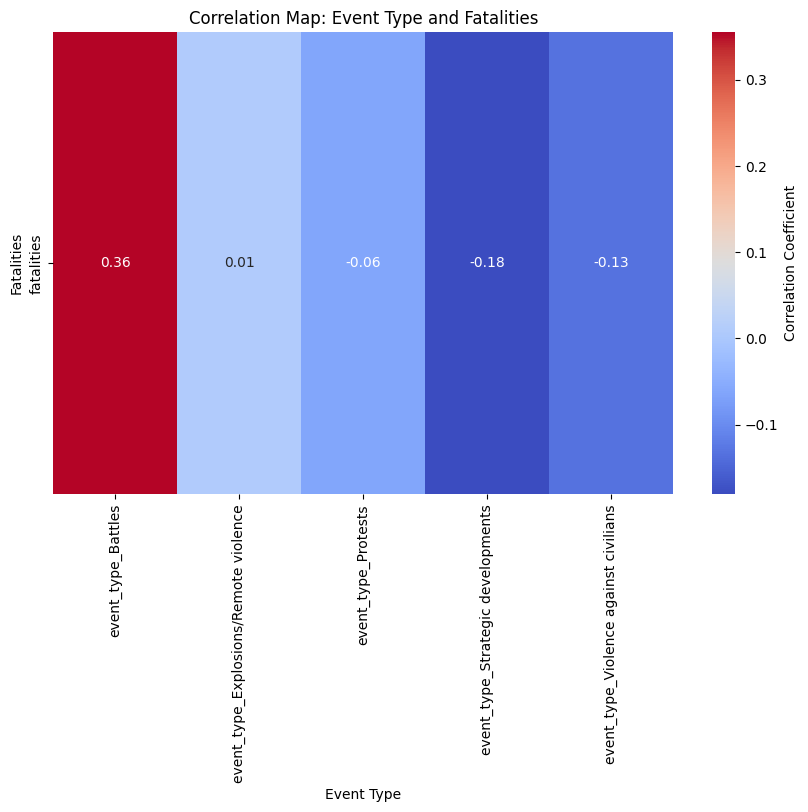

In [6]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns


data_selected = data[['event_type', 'fatalities']]

data_encoded = pd.get_dummies(data_selected, columns=['event_type'])

data_encoded = data_encoded.dropna(subset=['fatalities'])

correlation_matrix = data_encoded.corr()

correlation_fatalities = correlation_matrix[['fatalities']].drop(index='fatalities')

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_fatalities.T, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Map: Event Type and Fatalities')
plt.xlabel('Event Type')
plt.ylabel('Fatalities')
plt.show()


4. Balance Pie

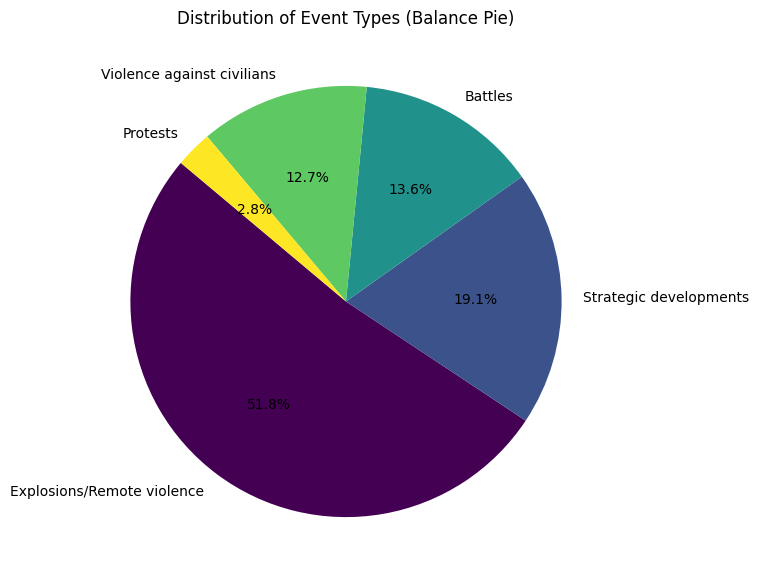

In [7]:
#balance pie

event_counts = data['event_type'].value_counts()

plt.figure(figsize=(10, 7))
event_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Distribution of Event Types (Balance Pie)')
plt.ylabel('')
plt.show()


d:\Applications\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 78.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Applications\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Applications\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Applications\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Applications\miniconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.3% of 

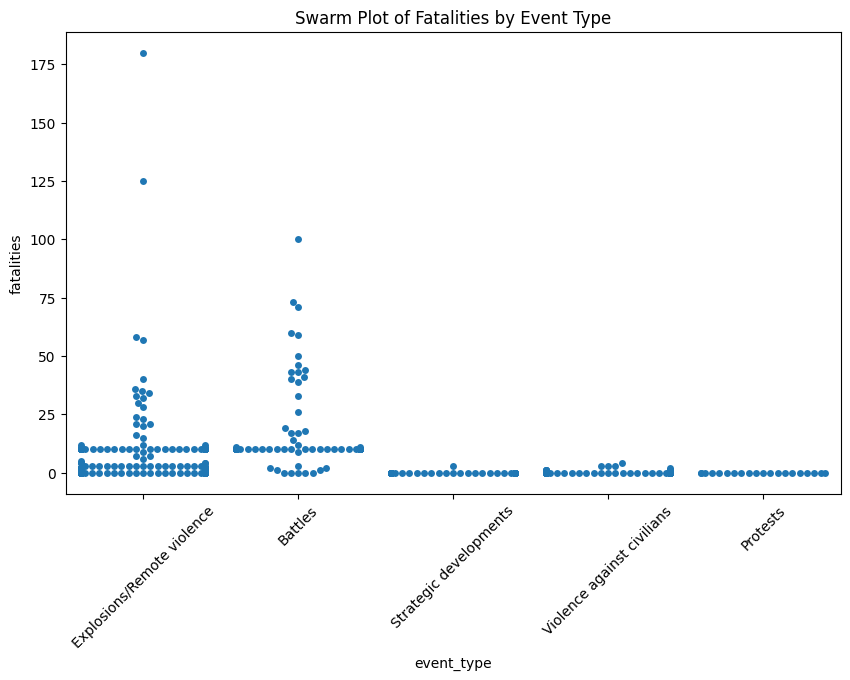

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'D:/Study/Graduate Study/CANVAS/2024Summer/CS4641/Project/Kherson_filtered_null.xlsx'
data = pd.read_excel(file_path)

data_selected = data[['event_type', 'fatalities']]

# Drop rows with NaN values 
data_selected = data_selected.dropna(subset=['fatalities'])

# Convert 'fatalities' to numeric
data_selected['fatalities'] = pd.to_numeric(data_selected['fatalities'], errors='coerce')

# Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='event_type', y='fatalities', data=data_selected)
plt.title('Swarm Plot of Fatalities by Event Type')
plt.xticks(rotation=45)
plt.show()


## Split dataset

In [9]:
data_selected = pd.get_dummies(data_selected, columns=['event_type'])

#train_data, val_test_data = train_test_split(data_selected, train_size=0.70, random_state=42, shuffle=True)

#val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42, shuffle=True)

train_data, val_test_data = train_test_split(data_selected, train_size=0.70, shuffle=True)

val_data, test_data = train_test_split(val_test_data, test_size=0.5, shuffle=True)

X_train = train_data.drop(columns=['fatalities'])
y_train = train_data['fatalities']

X_val = val_data.drop(columns=['fatalities'])
y_val = val_data['fatalities']

X_test = test_data.drop(columns=['fatalities'])
y_test = test_data['fatalities']

train_shape = train_data.shape
val_shape = val_data.shape
test_shape = test_data.shape

train_shape, val_shape, test_shape

((508, 6), (109, 6), (109, 6))

## Linear Regression

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

val_predictions = model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

# if all values are non-negative, then we can use mean_poisson_deviance
if (y_val >= 0).all() and (val_predictions > 0).all():
    val_poisson_loss = mean_poisson_deviance(y_val, val_predictions)
else:
    val_poisson_loss = "N/A (y_val and/or val_predictions contain negative or zero values)"
    
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# if all values are non-negative, then we can use mean_poisson_deviance
if (y_test >= 0).all() and (test_predictions > 0).all():
    test_poisson_loss = mean_poisson_deviance(y_test, test_predictions)
else:
    test_poisson_loss = "N/A (y_test and/or test_predictions contain negative or zero values)"

print(f'Validation MSE: {val_mse}')
print(f'Validation MAE: {val_mae}')
print(f'Validation Poisson Loss: {val_poisson_loss}')
print(f'Validation R^2: {val_r2}')

print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test Poisson Loss: {test_poisson_loss}')
print(f'Test R^2: {test_r2}')





Validation MSE: 96.08959288990826
Validation MAE: 5.323394495412844
Validation Poisson Loss: N/A (y_val and/or val_predictions contain negative or zero values)
Validation R^2: 0.2271612768954051
Test MSE: 89.80239392201835
Test MAE: 5.197247706422019
Test Poisson Loss: N/A (y_test and/or test_predictions contain negative or zero values)
Test R^2: 0.26650874861990304


## CatBoost: an implementation of gradient boosting on decision trees
discrete

In [11]:
categorical_features_indices = [i for i, col in enumerate(X_train.columns) if col in ['event_type']]

model = CatBoostRegressor(random_seed=42, iterations=500, learning_rate=0.1, depth=6, cat_features=categorical_features_indices, verbose=100)
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)


val_predictions = model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

# if all values are non-negative, then we can use mean_poisson_deviance
if (y_val >= 0).all() and (val_predictions > 0).all():
    val_poisson_loss = mean_poisson_deviance(y_val, val_predictions)
else:
    val_poisson_loss = "N/A (y_val and/or val_predictions contain negative or zero values)"
    
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# if all values are non-negative, then we can use mean_poisson_deviance
if (y_test >= 0).all() and (test_predictions > 0).all():
    test_poisson_loss = mean_poisson_deviance(y_test, test_predictions)
else:
    test_poisson_loss = "N/A (y_test and/or test_predictions contain negative or zero values)"

print(f'Validation MSE: {val_mse}')
print(f'Validation MAE: {val_mae}')
print(f'Validation Poisson Loss: {val_poisson_loss}')
print(f'Validation R^2: {val_r2}')

print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test Poisson Loss: {test_poisson_loss}')
print(f'Test R^2: {test_r2}')



0:	learn: 12.7797101	test: 10.9333422	best: 10.9333422 (0)	total: 148ms	remaining: 1m 13s
100:	learn: 12.1154798	test: 9.7487504	best: 9.7487504 (100)	total: 162ms	remaining: 641ms
200:	learn: 12.1154787	test: 9.7484878	best: 9.7484878 (199)	total: 179ms	remaining: 267ms
300:	learn: 12.1154787	test: 9.7484877	best: 9.7484877 (299)	total: 200ms	remaining: 133ms
400:	learn: 12.1154787	test: 9.7484877	best: 9.7484877 (399)	total: 222ms	remaining: 54.7ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 9.748487678
bestIteration = 402

Shrink model to first 403 iterations.
Validation MSE: 95.03301199862202
Validation MAE: 4.990604086182962
Validation Poisson Loss: 8.201127848942408
Validation R^2: 0.2356592484479949
Test MSE: 88.91152714384978
Test MAE: 4.850913200697566
Test Poisson Loss: 9.0206494063114
Test R^2: 0.2737852026139831


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_poisson_deviance

model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=20, 
    min_samples_split=5, 
    min_samples_leaf=4, 
    max_features='sqrt', 
    bootstrap=True, 
    oob_score=True, 
    n_jobs=-1, 
    random_state=42
)

model.fit(X_train, y_train)

val_predictions = model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

# if all values are non-negative, then we can use mean_poisson_deviance
if (y_val >= 0).all() and (val_predictions > 0).all():
    val_poisson_loss = mean_poisson_deviance(y_val, val_predictions)
else:
    val_poisson_loss = "N/A (y_val and/or val_predictions contain negative or zero values)"
    
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# if all values are non-negative, then we can use mean_poisson_deviance
if (y_test >= 0).all() and (test_predictions > 0).all():
    test_poisson_loss = mean_poisson_deviance(y_test, test_predictions)
else:
    test_poisson_loss = "N/A (y_test and/or test_predictions contain negative or zero values)"

print(f'Validation MSE: {val_mse}')
print(f'Validation MAE: {val_mae}')
print(f'Validation Poisson Loss: {val_poisson_loss}')
print(f'Validation R^2: {val_r2}')

print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test Poisson Loss: {test_poisson_loss}')
print(f'Test R^2: {test_r2}')


Validation MSE: 95.14141622505728
Validation MAE: 4.909531671997386
Validation Poisson Loss: N/A (y_val and/or val_predictions contain negative or zero values)
Validation R^2: 0.23478736439252423
Test MSE: 89.361068479059
Test MAE: 4.793951572362102
Test Poisson Loss: N/A (y_test and/or test_predictions contain negative or zero values)
Test R^2: 0.27011342258553506


## Naive Bayes

In [14]:
model = GaussianNB()
model.fit(X_train, y_train)


val_predictions = model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

# if all values are non-negative, then we can use mean_poisson_deviance
if (y_val >= 0).all() and (val_predictions > 0).all():
    val_poisson_loss = mean_poisson_deviance(y_val, val_predictions)
else:
    val_poisson_loss = "N/A (y_val and/or val_predictions contain negative or zero values)"
    
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

# if all values are non-negative, then we can use mean_poisson_deviance
if (y_test >= 0).all() and (test_predictions > 0).all():
    test_poisson_loss = mean_poisson_deviance(y_test, test_predictions)
else:
    test_poisson_loss = "N/A (y_test and/or test_predictions contain negative or zero values)"
    
val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f'Validation MSE: {val_mse}')
print(f'Validation MAE: {val_mae}')
print(f'Validation Poisson Loss: {val_poisson_loss}')
print(f'Validation R^2: {val_r2}')

print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test Poisson Loss: {test_poisson_loss}')
print(f'Test R^2: {test_r2}')

print(f'Validation Accuracy: {val_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print('\nClassification Report (Validation):\n', classification_report(y_val, val_predictions))
print('\nClassification Report (Test):\n', classification_report(y_test, test_predictions))
print('\nConfusion Matrix (Validation):\n', confusion_matrix(y_val, val_predictions))
print('\nConfusion Matrix (Test):\n', confusion_matrix(y_test, test_predictions))


Validation MSE: 100.36697247706422
Validation MAE: 6.146788990825688
Validation Poisson Loss: N/A (y_val and/or val_predictions contain negative or zero values)
Validation R^2: 0.19275875234564765
Test MSE: 91.30275229357798
Test MAE: 5.779816513761468
Test Poisson Loss: N/A (y_test and/or test_predictions contain negative or zero values)
Test R^2: 0.2542540670751158
Validation Accuracy: 0.1834862385321101
Test Accuracy: 0.22935779816513763

Classification Report (Validation):
               precision    recall  f1-score   support

         0.0       1.00      0.33      0.50        60
         1.0       0.00      0.00      0.00        13
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00        20
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0

d:\Applications\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Applications\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Applications\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Applications\miniconda3\Lib\site-packag